<font size=7>Create Raw dataset - ?Anterior? CA1

Here I create a raw datasets for the ?Anterior? CA1 dataset. I follow the tutorial `raw_data/1_processing_raw_data.ipynb` in order to create the raw dataset

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import pickle

import braingeneers.data.datasets_electrophysiology as ephys
from human_hip.spike_data import read_phy_files, raster_fancy_plot

In [ ]:
# Metadata for selecting different section of data to load
metadata = ephys.load_metadata("2023-04-02-e-hc328_unperturbed")

## <font color="blue"> Look at Spike Data

We look at the spike data to determine what would be a good portion of the recordign to zoom in on for the raw data. From looking at various pieces of data, the section of time I selected were **120-130**, **190-200**, and **350-365** seonds.

In [3]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


At aroun 120 seconds of the recording there is strong activity. **We use only the first 120-130 seconds for our intial analysis of the raw data**

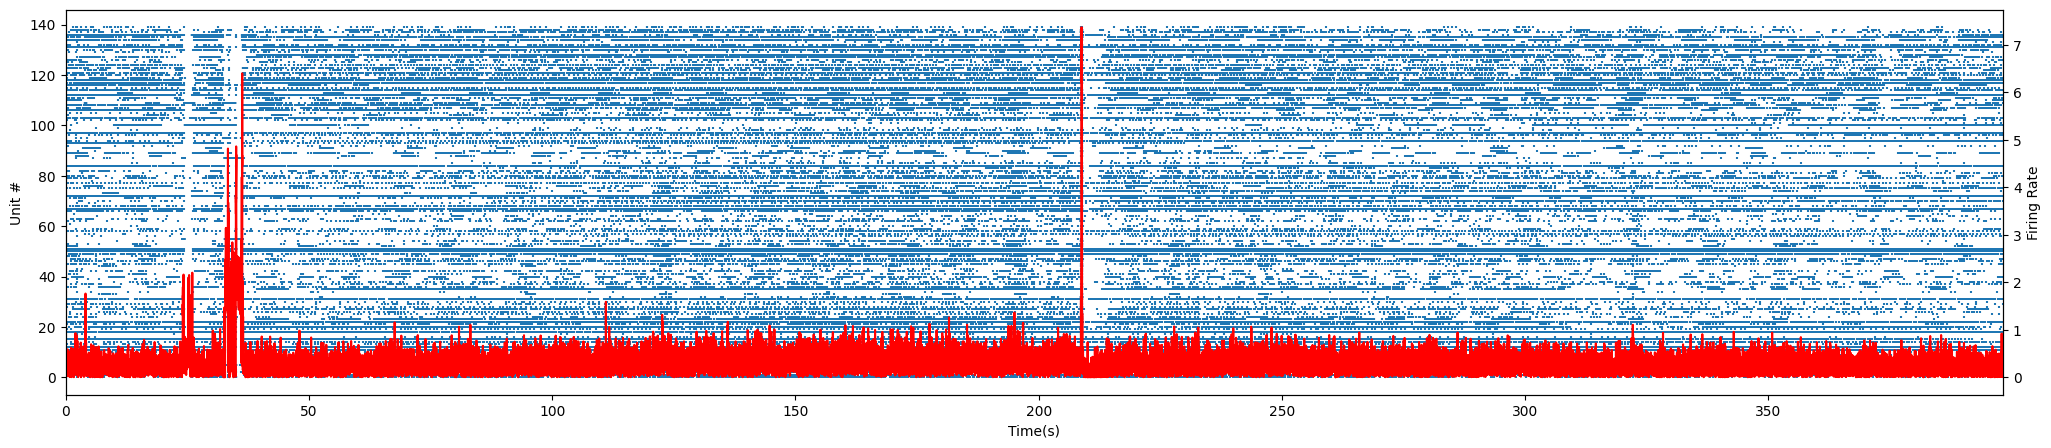

In [4]:
raster_fancy_plot(sd, xsize=25, ysize=5)

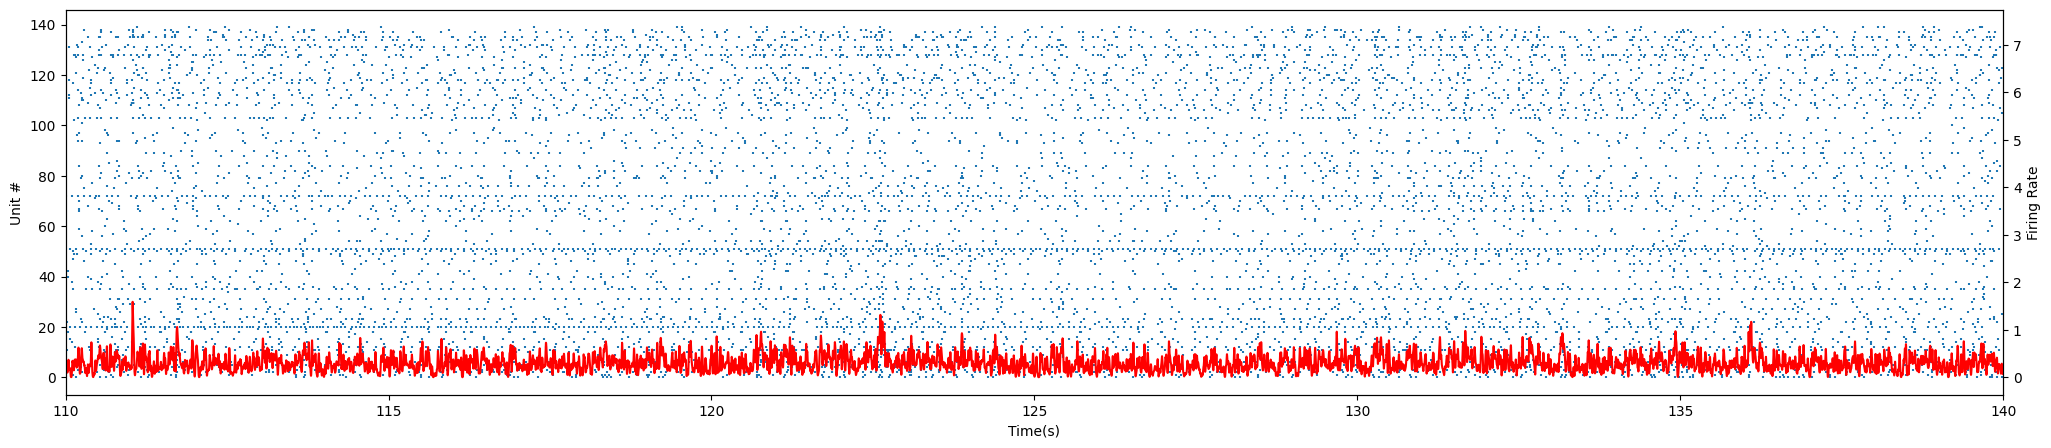

In [21]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=110, stop_time=140)

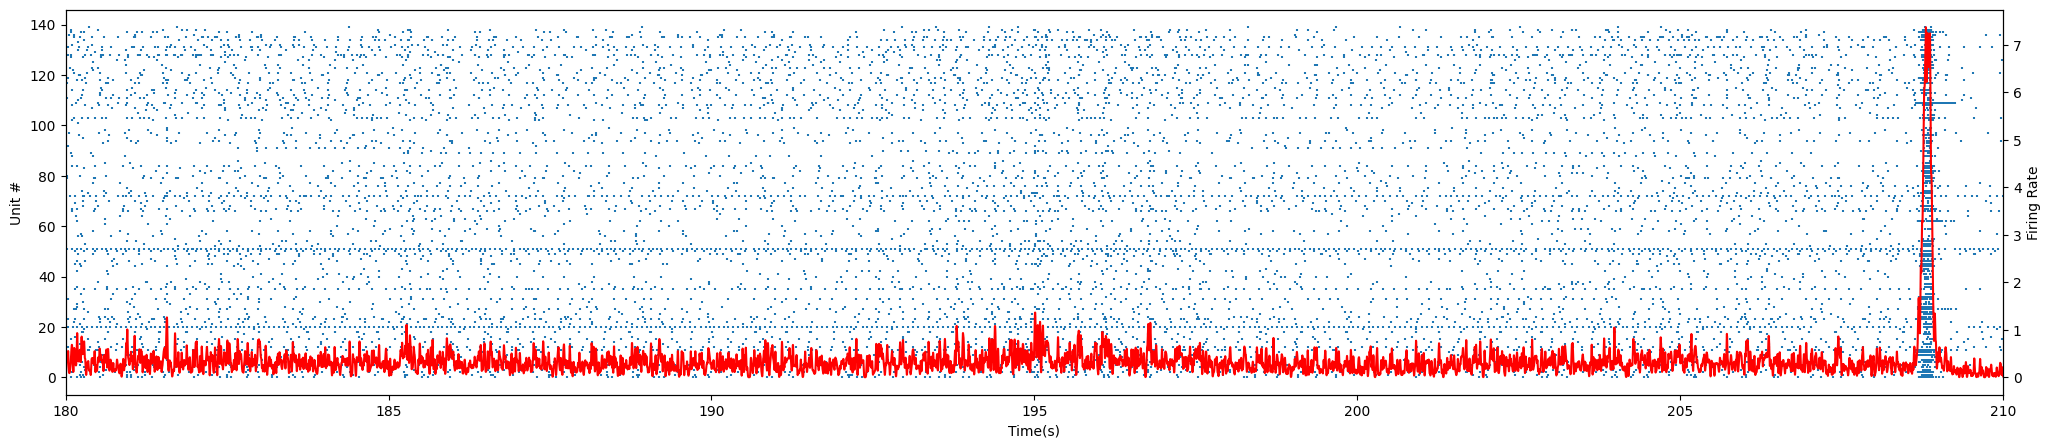

In [22]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=180, stop_time=210)

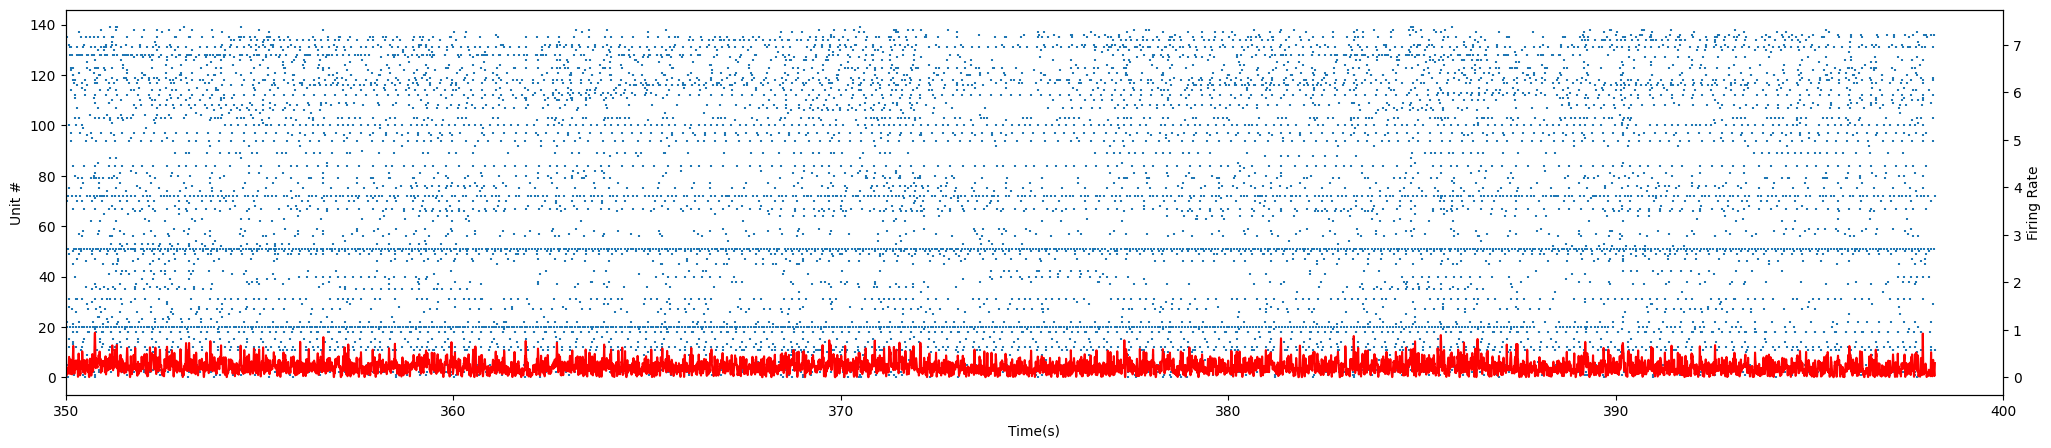

In [36]:
raster_fancy_plot(sd, xsize=25, ysize=5, start_time=350, stop_time=400)

# <font color="blue">190-120 seconds

get raw data

In [11]:
raw_data = ephys.load_data( metadata=metadata, experiment="experiment1", offset=190*20000, length=10*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2023-04-02-e-hc328_unperturbed is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [12]:
# metadata['ephys_experiments']['experiment1'] find which experiment relates to the file we want 
raw_data.shape # check data loaded correctly

(1028, 200000)

get channel x/y mapping for electrodes

In [15]:
channel_map = np.array( metadata['ephys_experiments']['experiment1']["mapping"] )


down sampel data

In [16]:

data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

save dataset

In [18]:
to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20, "start_time": 190, "stop_time": 200, 
             "file":"hc3.28_hckcr1_chip16835_plated34.2_rec4.2.raw.h5", "UUID":"2023-04-02-e-hc328_unperturbed"}

In [19]:
# with open( '/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start190s_stop200s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

check data loads correctly

In [20]:
a_file = open('/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start190s_stop200s_fs1ms.pkl', 'rb')
checkit = pickle.load(a_file)
a_file.close()
checkit

{'data': array([[392.41196, 395.6601 , 396.3152 , ..., 388.82462, 387.37814,
         386.9281 ],
        [515.56836, 519.23175, 517.4527 , ..., 522.0156 , 521.5279 ,
         521.4618 ],
        [180.28764, 182.04596, 182.11255, ..., 169.40524, 168.46297,
         167.2901 ],
        ...,
        [520.2777 , 531.8882 , 528.7065 , ..., 521.3086 , 521.42065,
         521.585  ],
        [351.5261 , 353.0008 , 352.0918 , ..., 345.9842 , 344.39413,
         344.5507 ],
        [492.78964, 498.10452, 496.38187, ..., 487.78482, 488.80884,
         489.42764]], dtype=float32),
 'xy': array([[18964.,   770.],
        [13714.,  1295.],
        [12160.,  1050.],
        ...,
        [ 8898.,  1715.],
        [23142.,   735.],
        [20540.,  1400.]]),
 'frame_rate': 1000.0,
 'start_time': 190,
 'stop_time': 200,
 'file': 'hc3.28_hckcr1_chip16835_plated34.2_rec4.2.raw.h5',
 'UUID': '2023-04-02-e-hc328_unperturbed'}

# <font color="blue"> 350-365 seconds

get raw data

In [37]:
raw_data = ephys.load_data( metadata=metadata, experiment="experiment1", offset=350*20000, length=15*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2023-04-02-e-hc328_unperturbed is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [38]:
# metadata['ephys_experiments']['experiment1'] find which experiment relates to the file we want 
raw_data.shape # check data loaded correctly

(1028, 300000)

get channel x/y mapping for electrodes

In [39]:
channel_map = np.array( metadata['ephys_experiments']['experiment1']["mapping"] )


down sampel data

In [40]:

data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

save dataset

In [41]:
to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20, "start_time": 350, "stop_time": 365, 
             "file":"hc3.28_hckcr1_chip16835_plated34.2_rec4.2.raw.h5", "UUID":"2023-04-02-e-hc328_unperturbed"}

In [42]:
# with open( '/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start350s_stop365s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

check data loads correctly

In [45]:
a_file = open('/workspaces/human_hippocampus/data/ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start350s_stop365s_fs1ms.pkl', 'rb')
checkit = pickle.load(a_file)
a_file.close()
print(checkit["data"].shape)
checkit

(972, 15000)


{'data': array([[410.3666 , 424.98843, 420.4331 , ..., 411.97772, 412.76868,
         412.21414],
        [519.1725 , 532.10565, 531.56384, ..., 526.7672 , 526.86316,
         525.23914],
        [195.7082 , 198.51195, 199.12201, ..., 192.08908, 190.8247 ,
         189.80927],
        ...,
        [527.5673 , 536.108  , 534.3492 , ..., 535.0285 , 534.35583,
         533.93176],
        [342.1597 , 355.3686 , 351.13287, ..., 365.0079 , 365.49823,
         366.7723 ],
        [491.79276, 496.78677, 497.77673, ..., 488.61554, 487.62436,
         486.56348]], dtype=float32),
 'xy': array([[18964.,   770.],
        [13714.,  1295.],
        [12160.,  1050.],
        ...,
        [ 8898.,  1715.],
        [23142.,   735.],
        [20540.,  1400.]]),
 'frame_rate': 1000.0,
 'start_time': 350,
 'stop_time': 365,
 'file': 'hc3.28_hckcr1_chip16835_plated34.2_rec4.2.raw.h5',
 'UUID': '2023-04-02-e-hc328_unperturbed'}

# <font color="blue"> 120-130 seconds

<font color="orange"> 

**Note:** This dataset was created a while back, before this notebook. The datafile is called, `ephys_raw/2023-04-02-e-hc328_unperturbed/raw_start120s_stop130s_fs1ms.pkl`. If you like, you can recreate this dataset bey following the same steps used to create the other files.